In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# used to supress display of warnings
import warnings

from sklearn.metrics import precision_recall_curve,accuracy_score,f1_score,precision_score,recall_score

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
import os


In [ ]:
class IdentityMetadata():
    def __init__(self, base, name):
        self.base = base
        # identity name
        self.name = name


    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name)

def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
            metadata.append(IdentityMetadata(path, i))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('img_align_celeba')

In [ ]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

Loading Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

In [ ]:
model = vgg_face()

model.load_weights('vgg_face_weights.h5')

In [ ]:
model.layers[0], model.layers[-2]

(<ZeroPadding2D name=zero_padding2d, built=True>,
 <Flatten name=flatten, built=True>)

In [ ]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

In [ ]:
type(vgg_face_descriptor)

keras.src.models.functional.Functional

In [ ]:
vgg_face_descriptor.inputs, vgg_face_descriptor.outputs

([<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=None, name=keras_tensor>],
 [<KerasTensor shape=(None, 2622), dtype=float32, sparse=False, name=keras_tensor_703>])

In [ ]:
img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)
img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape
embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step
(2622,)


In [ ]:
total_images = len(metadata)

print('total_images :', total_images)

total_images : 202599


Convert 202k image to embedding and store them in file .npy

In [ ]:
#This code is for embedding 202k images

#embeddings = np.zeros((metadata.shape[0], 2622))
#for i, m in enumerate(metadata):
#    img_path = metadata[i].image_path()
#    img = load_image(img_path)
#    img = (img / 255.).astype(np.float32)
#    img = cv2.resize(img, dsize = (224,224))
#    embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
#    embeddings[i]=embedding_vector

In [ ]:
#print('embeddings shape :', embeddings.shape)

In [ ]:
#np.save('data2.npy', embeddings)

In [ ]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

In [ ]:
#print(embeddings.shape)

In [ ]:
#embeddings

In [ ]:
embeddings = np.load('embed_file.npy') #that file i embedding all 202k images and store them in local device

In [ ]:
embeddings.shape

(202599, 2622)

In [ ]:
print(type(embeddings))

<class 'numpy.ndarray'>


Import target picture and embedding them

In [ ]:

img_input1 = load_metadata('target')  #folder that i store target picture

In [ ]:
embeddings_input = np.zeros((img_input1.shape[0], 2622))
for i, m in enumerate(img_input1):
    img_path2 = img_input1[i].image_path()
    img2 = load_image(img_path2)
    img2 = (img2 / 255.).astype(np.float32)
    img2 = cv2.resize(img2, dsize = (224,224))
    embedding_vector2 = vgg_face_descriptor.predict(np.expand_dims(img2, axis=0))[0]
    embeddings_input[i] = embedding_vector2

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 968ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


In [ ]:
embeddings_input

array([[ 0.01530847, -0.00680376,  0.01036573, ..., -0.01001994,
        -0.01141698, -0.00696506],
       [ 0.00629004,  0.00990793,  0.00998059, ..., -0.02813442,
        -0.01123934, -0.00151094],
       [ 0.00511043,  0.00032643,  0.00702501, ..., -0.00458575,
         0.01671549,  0.02109445],
       [-0.00281887, -0.00612031, -0.01830401, ..., -0.03073435,
        -0.00060538,  0.02204287],
       [ 0.00274151,  0.00691469, -0.00748271, ..., -0.02529603,
         0.00852406,  0.02674596]])

Find image 10: Don Addams

In [ ]:
input_embedding = embeddings_input[0] / np.linalg.norm(embeddings_input[0])
distances = np.array([distance(embeddings_input[0], emb) for emb in embeddings])

# Find indices of the most similar images
num_similar_images = 10  # You can change this according to your requirement
most_similar_indices = np.argsort(distances)[:num_similar_images]

# Retrieve the most similar images from embeddings
most_similar_images = embeddings[most_similar_indices]

In [ ]:
most_similar_indices

array([100099, 129089, 136723,  63840, 115717, 161195,  88616, 129074,
        14832, 183881], dtype=int64)

In [ ]:
def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance between {idx1} & {idx2}= {distance(embeddings_input[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(img_input1[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));

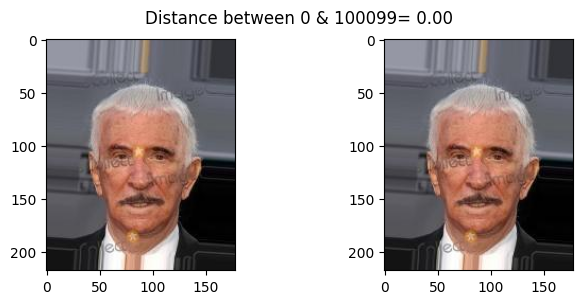

In [ ]:
show_pair(0,100099)

Find Image 6: Tom Cruise

In [ ]:
input_embedding = embeddings_input[1] / np.linalg.norm(embeddings_input[1])
distances = np.array([distance(embeddings_input[1], emb) for emb in embeddings])

# Find indices of the most similar images
num_similar_images = 10  # You can change this according to your requirement
most_similar_indices = np.argsort(distances)[:num_similar_images]

# Retrieve the most similar images from embeddings
most_similar_images = embeddings[most_similar_indices]

In [ ]:
most_similar_indices

array([114168, 177399,   7910, 159852,  51855,   2290, 164990, 179508,
       150183,  94904], dtype=int64)

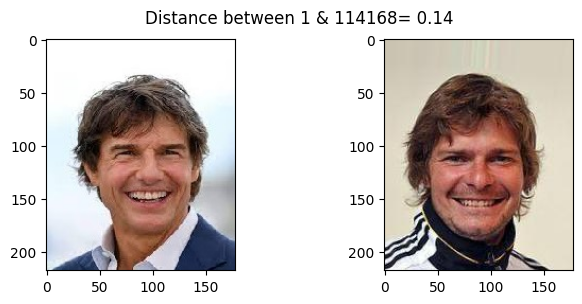

In [ ]:
show_pair(1,114168)

=> This is most similar face with Tom Cruise in 202k images dataset, so can conclude that Tom Cruise does not in this dataset

Find image 7: Yvette Vickers

In [ ]:
input_embedding = embeddings_input[2] / np.linalg.norm(embeddings_input[2])
distances = np.array([distance(embeddings_input[2], emb) for emb in embeddings])

# Find indices of the most similar images
num_similar_images = 10  # You can change this according to your requirement
most_similar_indices = np.argsort(distances)[:num_similar_images]

# Retrieve the most similar images from embeddings
most_similar_images = embeddings[most_similar_indices]

In [ ]:
most_similar_indices

array([202598,  68883,   4629,  86680,  45007,    578, 152305, 127776,
       119642, 157664], dtype=int64)

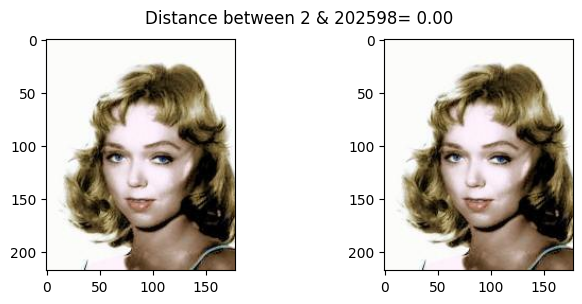

In [ ]:
show_pair(2,202598)

Find image 8: Taylor Swift

In [ ]:
input_embedding = embeddings_input[3] / np.linalg.norm(embeddings_input[3])
distances = np.array([distance(embeddings_input[3], emb) for emb in embeddings])

# Find indices of the most similar images
num_similar_images = 10  # You can change this according to your requirement
most_similar_indices = np.argsort(distances)[:num_similar_images]

# Retrieve the most similar images from embeddings
most_similar_images = embeddings[most_similar_indices]

In [ ]:
most_similar_indices

array([ 51560,  20924,  95476, 193392, 191316, 160727,  77053, 181058,
       149859,  85950], dtype=int64)

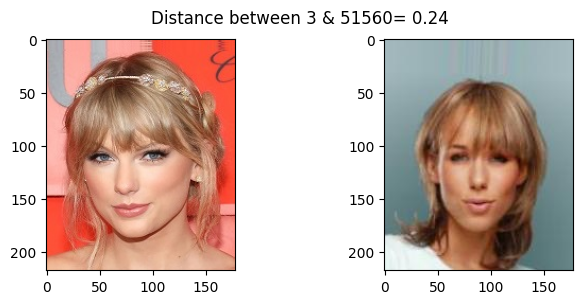

In [ ]:
show_pair(3,51560)

=> Cannot find Taylor Swift in this dataset

Find image 9: Nazan Eckes

In [ ]:
input_embedding = embeddings_input[4] / np.linalg.norm(embeddings_input[4])
distances = np.array([distance(embeddings_input[4], emb) for emb in embeddings])

# Find indices of the most similar images
num_similar_images = 10  # You can change this according to your requirement
most_similar_indices = np.argsort(distances)[:num_similar_images]

# Retrieve the most similar images from embeddings
most_similar_images = embeddings[most_similar_indices]

In [ ]:
most_similar_indices

array([  6281, 149007,   7165,  98109, 164568, 115202,  64687,  35130,
       128843, 194895], dtype=int64)

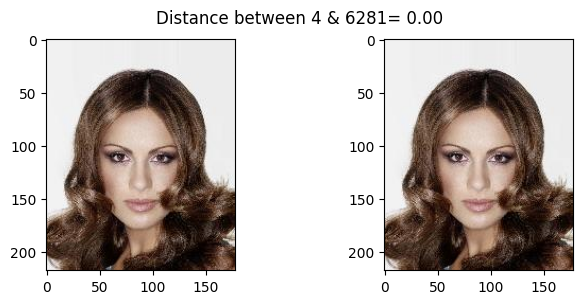

In [ ]:
show_pair(4,6281)